In [17]:
import numpy as np
import cv2 as cv
import sys
sys.path.append("../")
from matplotlib import pyplot as plt
from apt.quadtree import FixedQuadTree

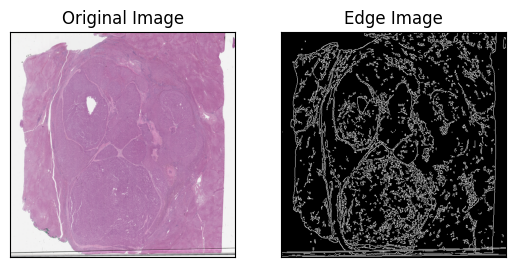

In [18]:
img = cv.imread('/Users/zhangenzhi/work/gvit-1/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/153100-2019-01-00-03-01/rescaled_image_0_512x512.png')
# img = cv.imread('/Volumes/data/dataset/miccai/rescale-images-16384/rescaled_image_0_16384x16384.png')
# img = cv.imread('/Volumes/data/dataset/test/n04525038_35823.JPEG')
# img = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_image_0_512x512.png')

img = cv.resize(img, (512,512))
img = img[..., ::-1]
grey_img = cv.GaussianBlur(img, (1,1), 0)
# grey_img = img
edges = cv.Canny(grey_img, 50, 110)

plt.subplot(121),plt.imshow(grey_img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

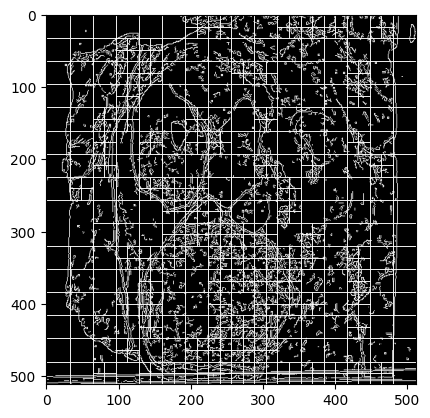

514


In [19]:
fig, ax = plt.subplots()
ax.imshow(edges, cmap = 'gray')
qdt = FixedQuadTree(domain=edges, fixed_length=512)
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()

In [87]:
qdt.encode_nodes()

[[0, 32, 480, 512],
 [32, 48, 496, 512],
 [48, 64, 496, 512],
 [32, 48, 480, 496],
 [48, 64, 480, 496],
 [0, 32, 448, 480],
 [32, 64, 448, 480],
 [64, 96, 480, 512],
 [96, 128, 480, 512],
 [64, 80, 464, 480],
 [80, 96, 464, 480],
 [64, 80, 448, 464],
 [80, 96, 448, 464],
 [96, 112, 464, 480],
 [112, 128, 464, 480],
 [96, 112, 448, 464],
 [112, 128, 448, 464],
 [0, 64, 384, 448],
 [64, 80, 432, 448],
 [80, 96, 432, 448],
 [64, 80, 416, 432],
 [80, 96, 416, 432],
 [96, 112, 432, 448],
 [112, 128, 432, 448],
 [96, 112, 416, 432],
 [112, 128, 416, 432],
 [64, 96, 384, 416],
 [96, 128, 384, 416],
 [128, 160, 480, 512],
 [160, 192, 480, 512],
 [128, 144, 464, 480],
 [144, 160, 464, 480],
 [128, 144, 448, 464],
 [144, 160, 448, 464],
 [160, 192, 448, 480],
 [192, 256, 448, 512],
 [128, 144, 432, 448],
 [144, 160, 432, 448],
 [128, 144, 416, 432],
 [144, 160, 416, 432],
 [160, 192, 416, 448],
 [128, 160, 384, 416],
 [160, 192, 384, 416],
 [192, 224, 416, 448],
 [224, 256, 416, 448],
 [192, 208

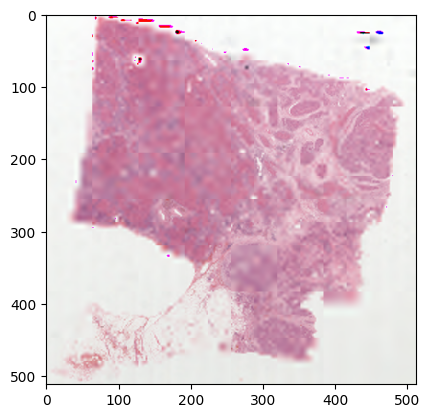

In [88]:
def patchify(mask, patch_size=8, channel=3):
    seq = qdt.serialize(mask, size=(patch_size,patch_size,channel))
    return seq

def depatchify(seq, patch_size=8, channel=3):
    # mask = np.zeros(shape=(512, 512, 3))
    mask = qdt.deserialize(seq, patch_size=patch_size, channel=channel)
    return mask

mask=img
seq = patchify(mask=mask)

fig, ax = plt.subplots()
mask= depatchify(seq=np.asarray(seq))
mask = mask.astype(np.uint8)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


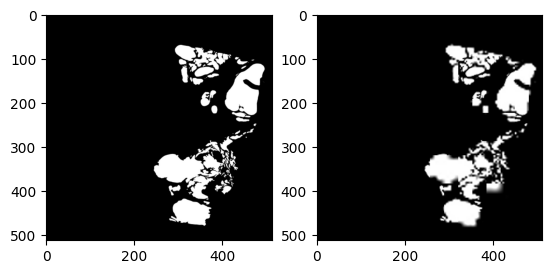

In [89]:
# mask = cv.imread('/Volumes/Extreme/dataset/paip/output_images_and_masks/128700-2019-01-00-03-01/rescaled_mask_0_512x512.png')
# mask = cv.imread('/Volumes/data/dataset/miccai/rescale-masks-16384/rescaled_image_0_16384x16384.png')
mask = cv.imread('/Volumes/data/dataset/paip/output_images_and_masks/153100-2019-01-00-03-01/rescaled_mask_0_512x512.png')
mask = cv.resize(mask, (512, 512))

seq = patchify(mask=mask, patch_size=8, channel=3)

plt.subplot(121)
plt.imshow(mask)
mask= depatchify(seq=seq, patch_size=8, channel=3)
mask = mask.astype(int)
plt.subplot(122)
plt.imshow(mask)
ax.imshow(mask, cmap = 'gray')
plt.show()
plt.close()


In [90]:
mask.shape

(512, 512, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


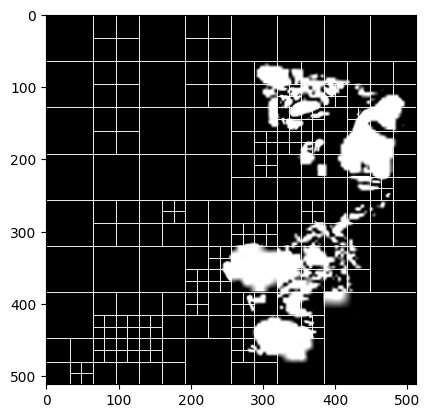

256


In [91]:
fig, ax = plt.subplots()
ax.imshow(mask, cmap = 'gray')
# qdt = FixedQuadTree(domain=mask[...,1], fixed_length=256)
qdt.draw(ax=ax)
plt.show()
print(qdt.count_patches())
plt.close()